# Исследование компьютерных игр.

**Цели и задачи:** Провести анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ. Определить основные факторы коммерческого успеха игры.

**План выполнения работы:**

* 1.Изучение общей информации о данных
* 2.Подготовка данных
  * 2.1 Преобразование данных в таблице
  * 2.2 Расчёт суммарных продаж во всех регионах 
* 3.Исследовательский анализ данных
  * 3.1 Сколько игр выпускалось в разные годы
  * 3.2 Анализ продаж для каждой платформы
  * 3.3 Платформы лидирующие по продажам
  * 3.4 Анализ глобальных продаж каждой игры по платформам
  * 3.5 Влияние отзывов пользователей и критиков на продажи внутри платформы PS4
  * 3.6 Сравнение зависимости продаж игр на всех платформах
  * 3.7 Анализ игровых жанров и прибыльности каждого из них
* 4.Портрет пользователя каждого региона
  * Самые популярные платформы (топ-5).
  * Самые популярные жанры (топ-5).
  * Влияние рейтинга ESRB на продажи в отдельном регионе.
* 5.Проверка гипотез
  * Средние пользовательские рейтинги платформ Xbox One и PC
  * Средние пользовательские рейтинги жанров Action и Sports.
* 6.Общий вывод

**Описание данных:**

Данные собраны в файле **`games.csv`**.

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1.Изучение общей информации о данных

In [1]:
# Импортирую необходимые библиотеки
import pandas as pd                    # Библиотека Pandas
import matplotlib.pyplot as plt        # Библиотека для визуализации
import numpy as np                     # Библиотека для математических вычислений
import seaborn as sns                  # Библиотека для визуализации данных
import datetime as dt                  # Библиотека для преобразования к типу данных "дата"
import math as mth                     # Библиотека для математических вычислений
from scipy import stats as st          # Библиотека для высокоуровневых математических вычислений
from plotly import graph_objects as go # Библиотека для интерактивной визуализации
import os

ClrG = '\033[32m'                      # Инициализирую переменную для вывода текста зелёным цветом 
ClrDef = '\033[0m'                     # Инициализирую переменную для вывода текста с дефолтными настройками

* Загрузим данные из файла **`games.csv`**, выведем первые 10 строк таблицы для первого взгляда на данные.
* Также с помощью метода `info()` изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.

In [2]:
pth1 = 'C:/Users/copok/Documents/Проекты/5 Сборный Проект — 1/games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df= pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
display(df.head(10))
print('-'*50)
display(df.info())
print('-'*50)
display(df.isnull().sum())
print('-'*50)
print('Количество дублированных строк:', sum(df.duplicated()))
print()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

--------------------------------------------------


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

--------------------------------------------------
Количество дублированных строк: 0



## Вывод

* Данные успешно загружены из файла. В таблице **`games`** 16715 строк(наблюдений) и 11 столбцов. Дубликатов не обнаружено.
* Тип данных в столбце `Year_of_Release` надо заменить на `int`.
* Тип данных в столбце `User_Scor`e надо заменить на `float64`.
* В некоторых столбцах до 50% пропущенных данных. Пропуски будут исследованы и обработаны далее.


# 2. Подготовка данных

### 2.1 Преобразование данных в таблице

**Приведём названия столбцов к нижнему регистру.**

In [4]:
# воспользуемся методом str.lower() для приведения названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**В столбце `'name'` 2 пропуска , в `'year_of_release'` 269 и в `'genre'` тоже 2. Это очень маленькое число значит можно их удалить без вреда для дальнейшего исследования.**

In [5]:
# Обработка пропущенных значений в столбце 'game', 'year_of_release', 'genre'
df.dropna(subset = ['year_of_release', 'name', 'genre' ], inplace = True)  # Удаление пустых строк,
#df.info()

**Обработка пропущенных значений в столбцах **`critic_score`**, **`user_score`** и **`rating`****

Пропущенные значения в столбце `critic_score` заполнить объективными и достоверными данными не получится, так как одна и та же игра может получить совершенно разную оценку в зависимости от платформы под которую она выпущена, ведь для `PC` почти всегда рейтинг ниже, чем для консольных платформ, поэтому считаю наиболее правильным решением - заполнить пропущенные значения в столбцах `critic_score` и `user_score` на условные маркеры `101` и `11` соответственно.

In [6]:
df["critic_score"] = df["critic_score"].fillna(101) # Замена пропусков в 'critic_score' на условный маркер "101"
df["user_score"] = df["user_score"].fillna(11)      # Замена пропусков в 'user_score' на условный маркер "11"
df["rating"] = df["rating"].fillna("NAN")           # Замена пропусков в 'rating' на условный маркер "NAN"

In [7]:
print('Пропусков после обработки:')
print('В "critic_score":', df['critic_score'].isnull().sum())
print('В "user_score":', df['user_score'].isnull().sum())
print('В "rating":', df['rating'].isnull().sum())

Пропусков после обработки:
В "critic_score": 0
В "user_score": 0
В "rating": 0


* В столбце **`user_score`** имеются такие значения как `tbd`, то есть подлежит обсуждению. Это значит, что для таких игр ещё не сформирована оценка пользователей, скорее всего это связано с отсутствием оценок либо с их очень маленьким количеством. 
* Таким образом данное значение необходимо заменить на условный маркер. 
* Для этого создаю новую функцию `set_user_score` которая заменит значение `tbd` на условный маркер `111`.

In [8]:
def set_user_score(row):      
    score = row['user_score'] # Переменная 'score' равна значению из столбца 'user_score'
    if score == "tbd":        # Если 'score' равно 'tbd', то
        score = 111           # 'score' равно 111 (условному маркеру)
        return score          # Функция возвращает новое значение 'score'
    else:                     # Иначе  
        return score          # Функция возвращает старое значение 'score'
    
# К датафрейму 'games' применяю функцию 'set_user_score' с помощью метода '.apply()'
df['user_score'] = df.apply(set_user_score, axis=1)
df['user_score'] = df['user_score'].astype('float') # Перевод типа данных из object в float

**Изменение типа данных **`release`****

In [9]:
df['year_of_release'] = df['year_of_release'].astype('int') #Замени типа данных на int в столбце "year_of_release"

In [10]:
# Для удобства дальнейшего анализа, значения в столбце `user_score` необходимо перевести из 10-бальной системы в 100-бальную систему
df['user_score'] = df['user_score'] * 10

### 2.2 Расчёт суммарных продаж во всех регионах

**Посчитаем суммарные продажи во всех регионах и запишем их в столбец **`total_sales`****

In [11]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df['total_sales'] = df['total_sales'].astype('float64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,110.0,NAN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,110.0,NAN,31.38


* Тип данных в столбце **`total_sales`** соответствует хранящейся информации (float64 для миллионов проданных копий).
* Пропущенных данных нет.

In [12]:
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Вывод

* Названия столбцов были приведены к нижнему регистру.
* Типы данных были преобразованы в соответствии с хранимой информацией.
* Год релиза игры **`year_of_release`** заменён на `int` 
* Оценка пользователей **`user_score`** заменена на `int` (значения `tbd` заменены на условный маркер)
* Пропуски были исследованы и обработаны.
  * В столбцах **`year_of_release`**, **`name`** , **`genre`** пропуски были удалены. (т.к их было очень мало и это не повлияет на дальнейшее исследование)
  * В столбце **`rating`** значения RP заменены на NaN, так как рейтинг в данном случае отсутствует
  * В столбцах **`critic_score`** и **`user_score`** пропущенные значения заменили  на условные маркеры
* Добавлен параметр суммарных продаж в столбец **`total_sales`**.

# 3.Исследовательский анализ данных

### 3.1 Сколько игр выпускалось в разные годы

* Чтобы проанализировать, сколько игр выпускалось ежегодно, сформирую сводную таблицу по столбцу **`год релиза игры`** и посчитаю количество выпущенных игр для каждого года. 
* На основе полученных данных построю столбчатую гистограмму для визуального анализа полученных результатов.

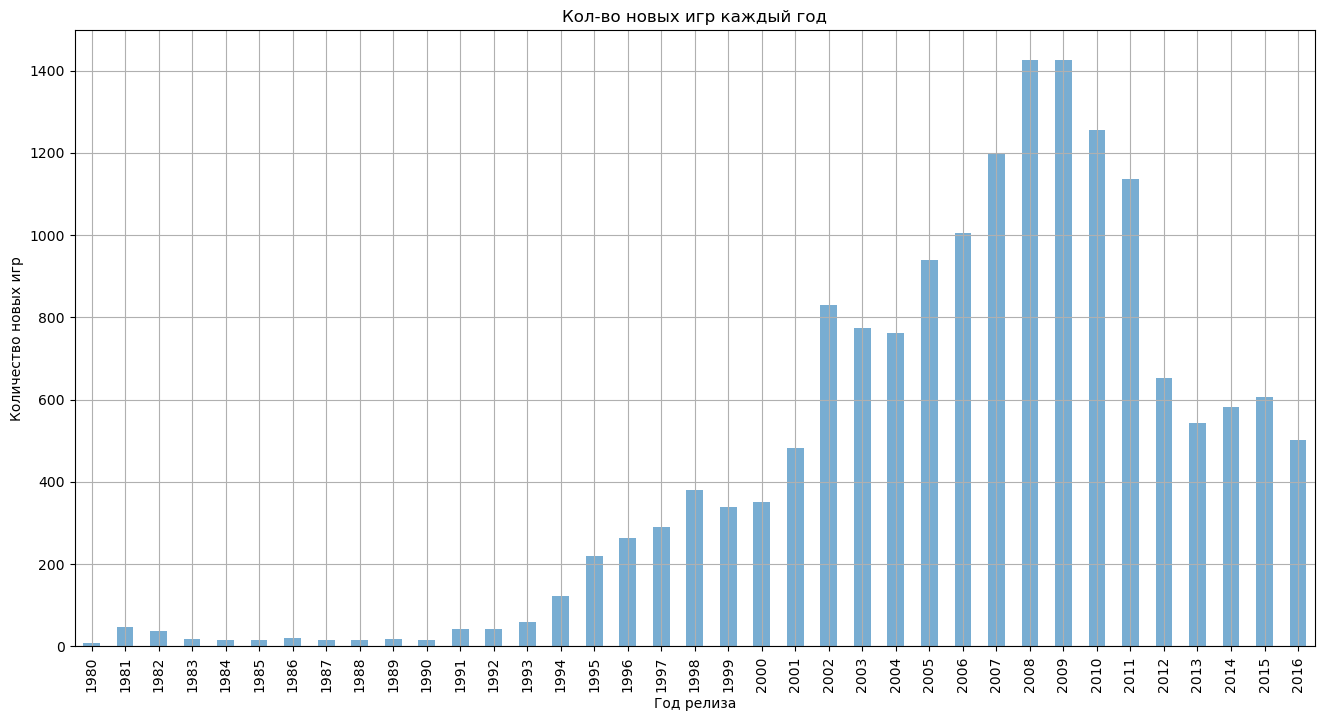

In [13]:
(
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(y='name', kind='bar', figsize=(16, 8), 
                                                                       title='Кол-во новых игр каждый год', 
                                 grid=True, alpha=0.6, legend=False).set(xlabel='Год релиза', ylabel='Количество новых игр')
                                                                                                                          
    
)    
    
plt.show()

* На гистограмме наглядно видно, что рост игровой индустрии наблюдается в начале **00ых годов**. Начиная с **2001 года**, наблюдается стремительный рост ежегодно выпускаемых игр.
* Актуальным периодом для анализа является временной диапазон: **1995-2016 года**.

### 3.2 Анализ продаж для каждой платформы

**Чтобы проанализировать объём продаж для каждой платформы, необходимо сформировать сводную таблицу по столбцу platform и посчитать сумму продаж с помощью функции .sum().**

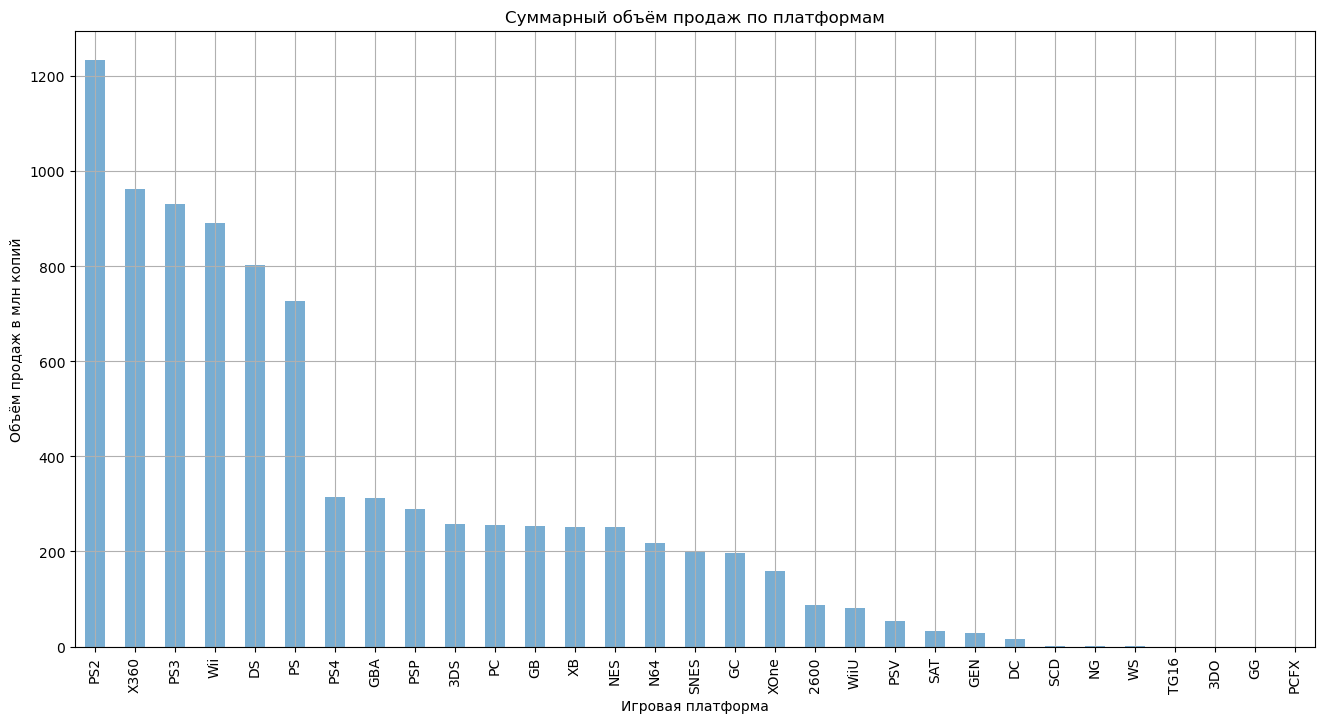

In [14]:
(
    df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values('total_sales', ascending = False)\
    .plot(y='total_sales', kind='bar', figsize=(16, 8), title='Суммарный объём продаж по платформам',\
          grid=True, alpha=0.6, legend=False)\
    .set(xlabel='Игровая платформа', ylabel='Объём продаж в млн копий')
)
plt.show()

* На гистограмме видно, что такие платформы как `PS2`, `X360`, `PS3`, `Wii`, `DS`, и `PS` значительно превосходят остальные платформы по суммарному объёму продаж за весь анализируемый период. 
* Для дальнейшего анализа считаю более правильным выбрать топ 5 платформ по объёму продаж, которые буду анализировать.

C:\Users\copok\AppData\Local\Temp\ipykernel_7904\2188068101.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'total_sales_x'} in the result is deprecated and will raise a MergeError in a future version.
  PS2.merge(X360, how='outer', on='year_of_release')
C:\Users\copok\AppData\Local\Temp\ipykernel_7904\2188068101.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  top5_data.set_axis(['PS2', 'X360', 'PS3', 'Wii', 'DS'], axis = 'columns', inplace = True)


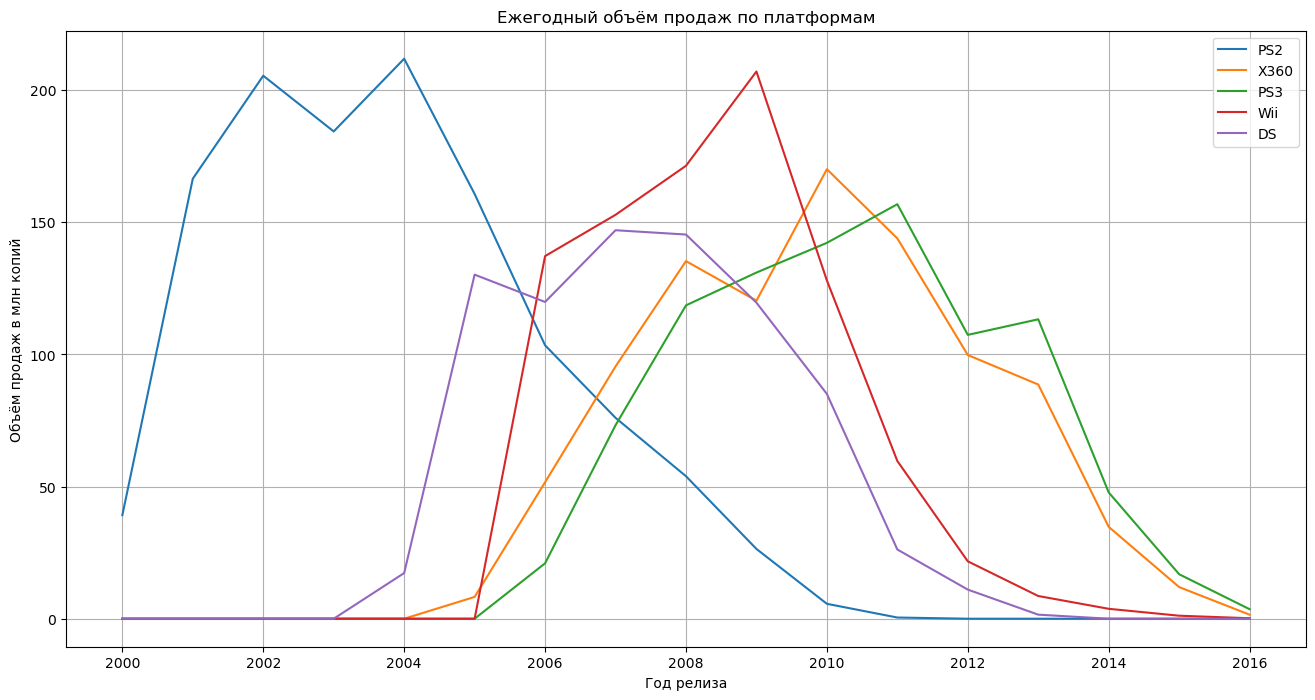

In [15]:
# Формирую 5 df для каждой платформы с помощью метода .query (Объём продаж под каждую платформу в каждый год)
PS2 = df.query('platform =="PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
X360 = df.query('platform =="X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
PS3 = df.query('platform =="PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
Wii = df.query('platform =="Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
DS = df.query('platform =="DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# Создаю сводную таблицу, где для каждой платформы указан ежегодный объём продаж
top5_data = (
    PS2.merge(X360, how='outer', on='year_of_release')
    .merge(PS3, how='outer', on='year_of_release')
    .merge(Wii, how='outer', on='year_of_release')
    .merge(DS, how='outer', on='year_of_release')
)
# Переименовываю названия столбцов для убобства
top5_data.set_axis(['PS2', 'X360', 'PS3', 'Wii', 'DS'], axis = 'columns', inplace = True)
top5_data = top5_data.query('year_of_release >= 1995').fillna(0) # Пропуски заменяю на 0, фильтрую значения от 2000 года и выше

# Рисую гистограмму для визуального анализа полученных результатов
top5_data.plot(figsize=(16, 8), title='Ежегодный объём продаж по платформам', grid=True)\
                                                                    .set(xlabel='Год релиза', ylabel='Объём продаж в млн копий')
plt.show()

* На диаграмме видно, что в среднем цикл продаж составляет 8 лет для каждой платформы. 
* За этот период игры под платформу продаются следующим образом: первые 4 года высокие темпы продаж, последние 4 года низкие темпы продаж (спад продаж), это обусловлено тем, что выходит более новая платформа и игроки постепенно начинают переходить на новую платформу. 
* Такой переход длится примерно 3-4 года, в так называемый "момент перехода" продажи игр под старое поколение платформ резко снижается, а под новое поколение резко растёт. 
* Данная тенденция хорошо прослеживается на примере платформ PS2 и PS3. Но такая тенденция характерна для всех поколений платформ, так как игровая индустрия развивается циклически.

* **Вывод:** 
  * Таким образом, актуальным периодом для дальнейшего анализа можно считать период: **с 2012 по 2016 года**.

In [16]:
# Отфильтруем таблицу и оставим только строки где дата релиза с 2012 по 2016 включительно, полученную таблицу запишу в новый df
df_new = df.query('year_of_release >= 2012')
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,110.0,NAN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,101.0,110.0,NAN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


### 3.3 Платформы лидирующие по продажам

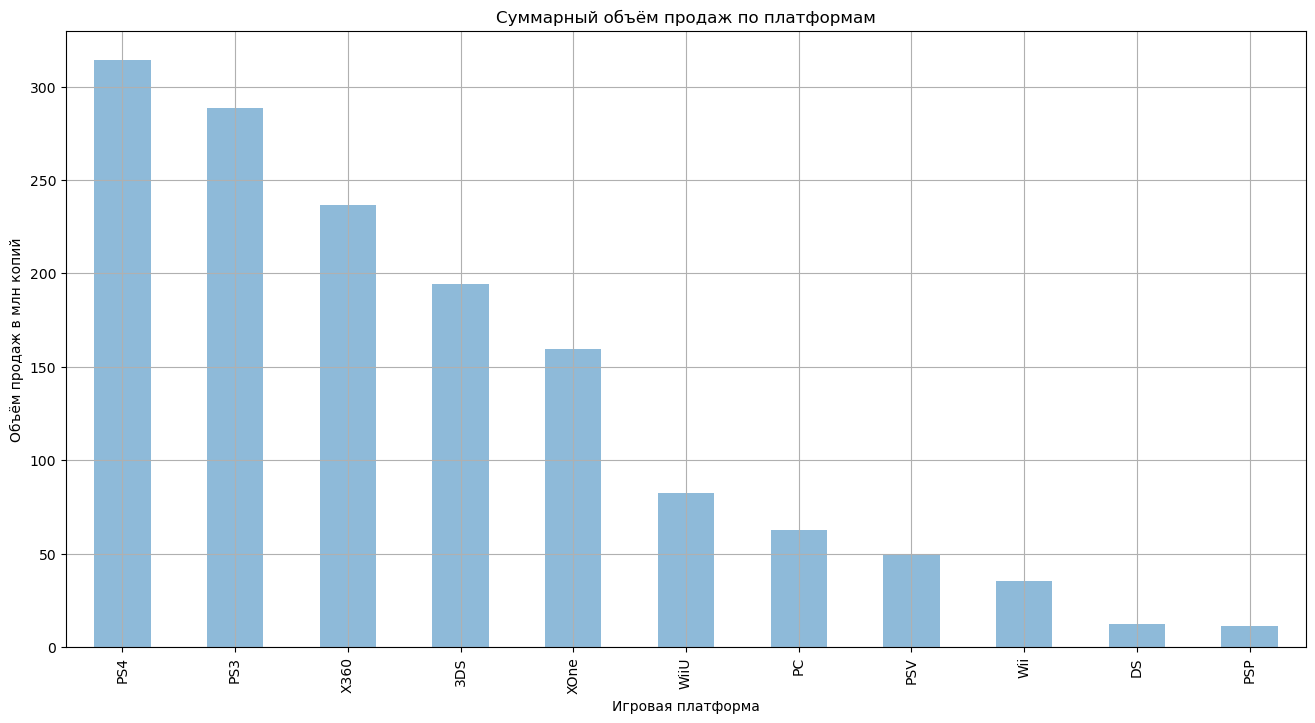

In [17]:
(
    df_new.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values('total_sales', ascending = False)\
    .plot(y='total_sales', kind='bar', figsize=(16, 8), title='Суммарный объём продаж по платформам',
          grid=True, alpha=0.5, legend=False)\
    .set(xlabel='Игровая платформа', ylabel='Объём продаж в млн копий')
)
plt.show()

**Исследование динамики продаж**

In [18]:
platforms_table = df_new.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
platforms_table


,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


* Несмотря на продажи игр после 2012 года, поддержка некоторых из этих консолей за актуальный период была прекращена.
* Выведем график, чтобы отсечь те платформы, что к 2016 году перестали производить игры.

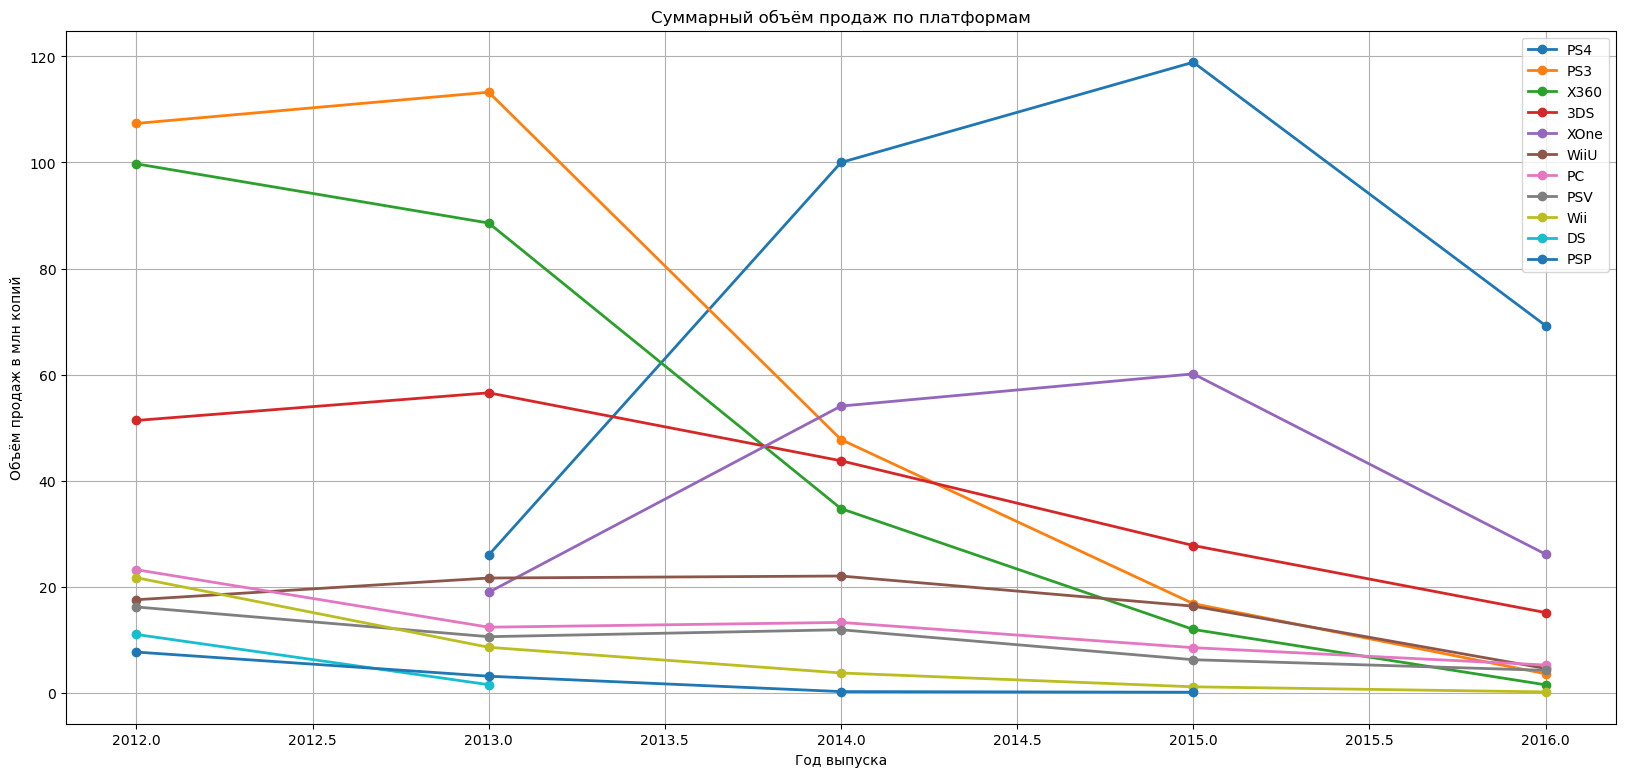

In [19]:
platforms_grouped = df_new.groupby(['platform', 'year_of_release'])['total_sales'].sum()

platform = platforms_table.index
for i in platform:
    platforms_grouped[i].plot(style='o-', kind='line', figsize=(20, 9), label=i, linewidth=2, grid=True)
    plt.title('Суммарный объём продаж по платформам')
    plt.legend()
    plt.xlabel('Год выпуска')
    plt.ylabel('Объём продаж в млн копий')

plt.show()

* `DS` выпустила свою последнюю игру в 2013 году. 
* `PSP` также прекратила выпуск в 2015. 
* К **2016 году** почти в ноль ушли `PS3`, на смену которой пришла `PS4`
* `X360` которую сменила `XOne`
* `Wii` новой версией которой стала `Wii U`. 
* Таким образом, мы можем выделить ряд действительных на **2016 год** игровых приставок: `PS4` от `PlayStation`, `XOne` от `XBox`, `WiiU` от `Nintendo`. 
* Также портативные консоли `3DS` от `Nintendo` и `PSV` от `Play Station`. 
* Кроме того, продолжается выпуск игр для компьютеров(PC).

**Лидерами продаж являются PS4, XOne и 3DS. Актуальный датасет выглядит следующим образом.**

In [20]:
# Отфильтрую таблицу и оставлю только строки с топ-5 прибыльными платформами (PS4, XOne, 3DS, WiiU, PC)
df_new = df_new.query('platform == "PS4" or platform == "XOne" or platform == "3DS" \
                                        or platform == "WiiU" or platform == "PC"')
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,110.0,NAN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,101.0,110.0,NAN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,101.0,110.0,NAN,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,72.0,E,9.90


### 3.4 Анализ глобальных продаж каждой игры по платформам

In [21]:
# Создаем df для анализа продаж в актуальный период
df_platform = df.query('year_of_release >= 2012')

In [22]:
df_platform['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

* В среднем продажи игр исчисляются сотнями тысяч копий. 
* `Медиана` - 120 тысяч копий, в то время как `среднее` значение в 5 раза больше - 500 тысяч проданных копий. 
* Это говорит о том, что отдельные игры значительно лидируют по популярности среди пользователей и мы можем наблюдать некоторое количество очень крупных выбросов.
* Макисмальное значение в актуальном датасете 21 млн. проданных копий с 2012 года.

**Построим диаграмму размаха без выбросов для наглядности.**

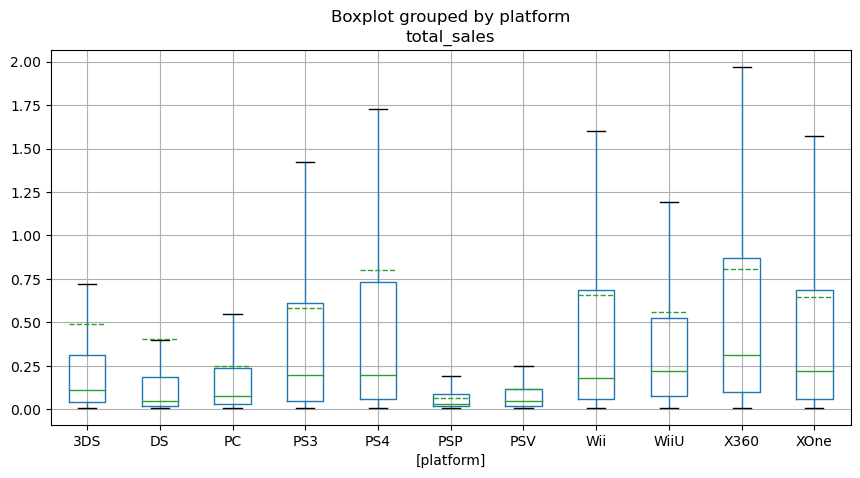

In [23]:
a = df_platform[['total_sales', 'platform']]
ax = a.boxplot(by='platform', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes', figsize=(10, 5))

**Рассмотрим поближе платформы которые мы определили как наиболее актуальные**

In [24]:
df_new['total_sales'].describe()

count    1432.000000
mean        0.567675
std         1.271066
min         0.010000
25%         0.050000
50%         0.150000
75%         0.480000
max        14.630000
Name: total_sales, dtype: float64

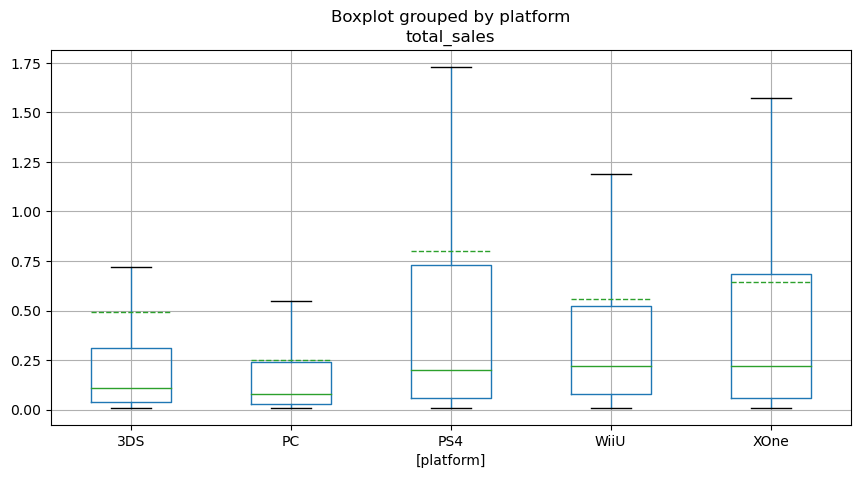

In [25]:
a = df_new[['total_sales', 'platform']]
ax = a.boxplot(by='platform', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes', figsize=(10, 5))

* Согласно графику, медианное значение продаж игр платформ `PS4`, `WiiU` и `XOne` - **0,2**, **0,22** и **0,22** млн. копий соответственно. 
* Несмотря на то, что медиана продаж `PS4` чуть меньше, чем `XOne`, ее среднее значительно больше - **0,8** млн. копий (у `XOne` в районе **0,65** млн.) и граница усов выше - **1,73** млн. 
* То есть сама коробка находится на одном и том же уровне, но усы платформы от **PlayStation** длиннее и среднее находится за пределами третьего квартиля. Это говорит, что у `PS4` есть ряд игр, ставших бестселлерами игровой индустрии за текущий период. У `XOne` они тоже есть, но не в таком количестве.

* Интересно также, что среднее значение продаж игр на платформе `3DS` **0,49** приближено к границе верхнего уса **0,73**, тогда как медиана в районе **0,11**. Разница между ними составляет почти **0,4** млн. копий. 
* Примерно такая же разница между медианой (**0,22**) и средним (**0,55**) у продаж платформы `WiiU`, однако крайняя точка усов высоко (почти **1,2** млн. копий). 
* Можно предположить, что у портативной консоли `3DS` больше единичных игр, уже завоевавших признание пользователей в прошлом, но превалирующее большинство выпущенных игр совсем не популярно.
* В то время как `WiiU` стандартно выпускает игры с преимущественно одинаковым успехом у пользователей. 
* Срок существования этих платформ примерно одинаковый (5 лет `3DS`, 4 года `WiiU`), но суммарные продажи первой за все время почти в 3 раза больше, чем второй; за актуальный период в 2,2 раза.
* Кроме того, в 2017 году компания **Nintendo** прекратит поддержку платформы `WiiU`. График выше подтверждает это: пик продаж игр платформы `3DS` произошел в момент ее запуска в 2012 году, а затем ее популярность стала падать.
* `WiiU` весь период существования выпускала игры, копии которых продавались с успехом в районе 100 тысяч.

* Рост популярности домашних и портативных консолей повлиял на пользовательский интерес к играм на `ПК`. 
* За актуальный период медианные продажи составили примерно **0,08** млн. копий. Среднее в районе **0,25**. 
* Тем не менее граница третьего квартиля обозначена цифрой в **0,52** млн. копий, что также говорит о наличии выбросов, то есть более успешных единичных релизов.

* Наименьшей популярностью пользуется `PSV`. 
* Видимо, качество контента платформы или самой консоли оказалось заметно ниже ее конкурента от **Nintendo** и, по сравнению с `3DS` на ней нет настолько выдающихся бестселлеров.

**Проверим наши выводы, построив диаграмму размаха с выбросами.**

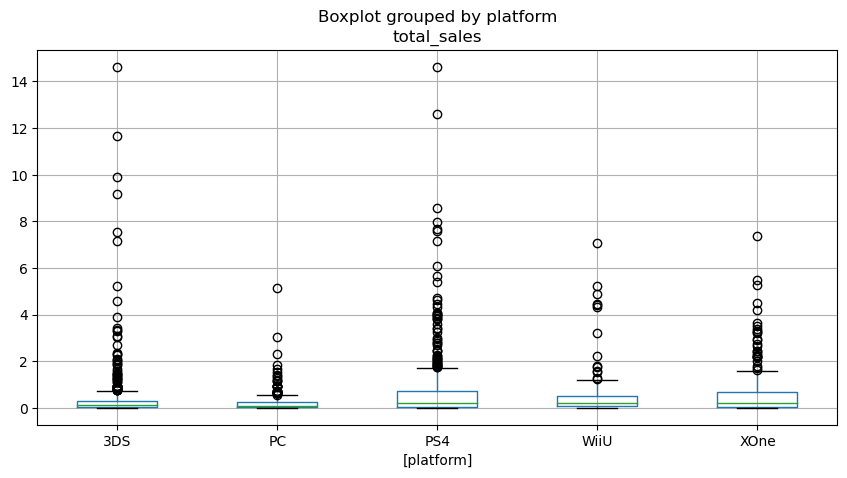

In [26]:
a = df_new[['total_sales', 'platform']]
ax = a.boxplot(by='platform', meanline=True, showcaps=True, 
                showbox=True, showfliers=True, return_type='axes', figsize=(10, 5))

* Да, действительно. Сравнивая конкурентов `PS4` и `XOne`, можно отметить, что на первой платформе выходили игры,  завоевавшие наибольшую популярность у пользователей. Выбросов много и числовые значения их доходят вплоть до **14,5** млн. копий, тогда как пиковое значение `XOne` - **7,5** млн.

* Такая же история с `3DS`. Есть игры бесспорные лидеры игровой индустрии - **11,7** и **14,5** млн. копий - и в целом количество выбросов намного больше нежели.

* Тезис о ровных продажах игр на платформе `WiiU` также подтверждается графиком с выбросами. Особо популярные игры были, но относительно других платформ их немного. Зато медиана на высоком уровне, сравнимом с конкурентами ее следующей версии - **Nintendo Switch**.

* Наличие небольшого количества выбросов на `ПК` также подтверждает сделанные ранее выводы.

### 3.5 Влияние отзывов пользователей и критиков на продажи внутри платформы PS4

Для анализа влияния отзывов пользователей и критиков на продажи игр я возьму наиболее актуальную платформу на мой взгляд - `PS4` и проанализирую корреляцию между отзывами Пользователей и Продажами и корреляцию между отзывами Критиков и Продажами.

In [27]:
# Формирую df с платформой PS4 и правильными значениями 'user_score'
user_ps4 = df_new.query('platform =="PS4" and user_score < 101')
user_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             257 non-null    object 
 1   platform         257 non-null    object 
 2   year_of_release  257 non-null    int32  
 3   genre            257 non-null    object 
 4   na_sales         257 non-null    float64
 5   eu_sales         257 non-null    float64
 6   jp_sales         257 non-null    float64
 7   other_sales      257 non-null    float64
 8   critic_score     257 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           257 non-null    object 
 11  total_sales      257 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 25.1+ KB


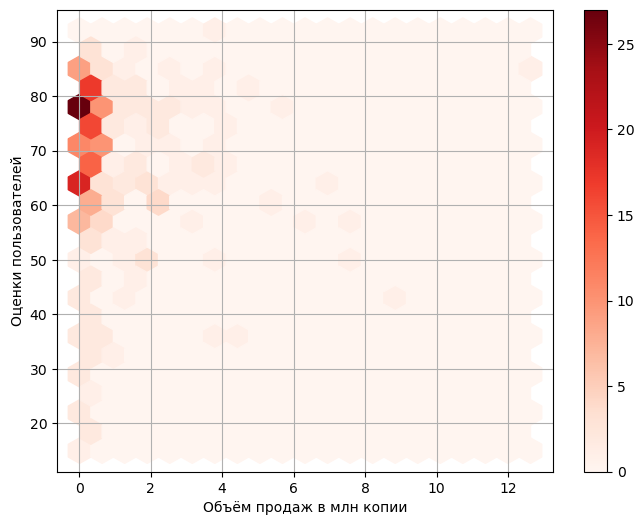

Значение корреляции: -0.03195711020455641


In [28]:
user_ps4.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='hexbin', 
                                     gridsize=20, figsize=(8, 6),sharex=False, grid=True, cmap=plt.cm.Reds)\
                                   .set(xlabel='Объём продаж в млн копии', ylabel='Оценки пользователей')
plt.show()
print('Значение корреляции:' , user_ps4['user_score'].corr(user_ps4['total_sales']))

* Коэффициент корреляции Пирсона отрицательный, но близкий к нулю. Это сложно, поскольку мы не можем точно сказать, либо рост продаж связан с уменьшением пользовательских оценок, либо, наоборот, хорошие оценки пользователей получают именно те игры, продажи которых не задались. Или же тесной линейной связи между этими значениями нет.

* Можно предположить, что субъективные оценки игроков основаны на множестве разных факторов. Например, крайне популярные игры за счет стратегий маркетингового продвижения сформировали повышенные ожидания, которые не были оправданы у пользователей. Или пользователи более склонны положительно оценивать эксклюзивные, на их взгляд, продукты, не дошедшие до массового потребителя.

* Кроме того, предыдущий анализ средних продаж позволяет нам сказать, что все-таки наибольшее число игр платформы не пользуется особой популярностью,  их тираж исчисляется сотнями тысяч проданных копий  именно они и собирают основную базу как положительных, так и отрицательных оценок. Коммерчески успешные продукты подвержены большей критике, поэтому отзывы разнятся.

* Если проанализировать затемнения в середине графика, то можно сказать, что относительно популярные для платформы игры, продажи которых исчисляются миллионами копий, собирают средние оценки в районе **55-70 баллов**. Один из самых успешных продуктов с продажами в **12 млн. копий**, как видно по небольшому пятну в правом верхнем углу все-таки удостоился чуть большего количества высоких оценок в **85**, чем всех остальных.

In [29]:
# Формирую df с платформой PS4 и правильными значениями 'critic_score'
critic_ps4 = df_new.query('platform =="PS4" and critic_score < 101')
critic_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             252 non-null    object 
 1   platform         252 non-null    object 
 2   year_of_release  252 non-null    int32  
 3   genre            252 non-null    object 
 4   na_sales         252 non-null    float64
 5   eu_sales         252 non-null    float64
 6   jp_sales         252 non-null    float64
 7   other_sales      252 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       252 non-null    float64
 10  rating           252 non-null    object 
 11  total_sales      252 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 24.6+ KB


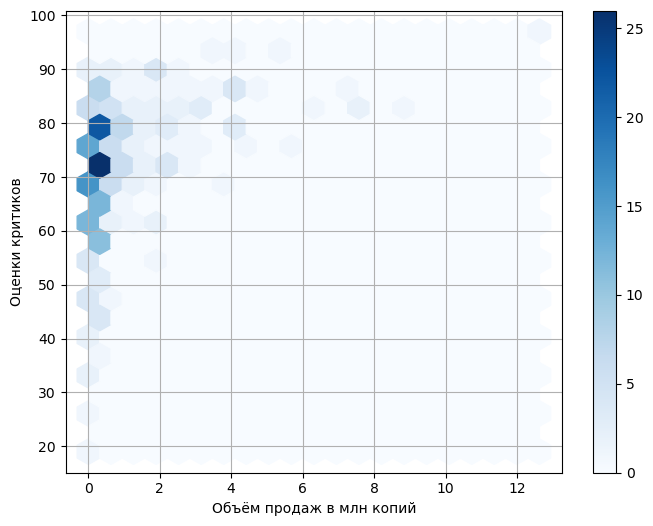

Значение корреляции: 0.40656790206178095


In [30]:
critic_ps4.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='hexbin', 
                                    gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap=plt.cm.Blues)\
                                    .set(xlabel='Объём продаж в млн копий', ylabel='Оценки критиков')
plt.show()
print('Значение корреляции:' , critic_ps4['critic_score'].corr(critic_ps4['total_sales']))

* Коэффициент больше нуля. Зависимость между значениями не высокая, но она есть. Популярные продукты платформы собирают больше положительных отзывов критиков, чем пользователей.

### 3.6 Сравнение зависимости продаж игр на всех платформах

* Полученные в предыдущем пункте выводы актуальны для платформы `PS4`, но также необходимо сравнить ситуацию для всех платформ и сделать заключение, является ли актуальным вывод полученный в предыдущем шаге для всех платформ или нет.

* Возьмем несколько платформ

In [31]:
df_new['user_score'].head()

31    110.0
33    110.0
42     83.0
47    110.0
62     72.0
Name: user_score, dtype: float64

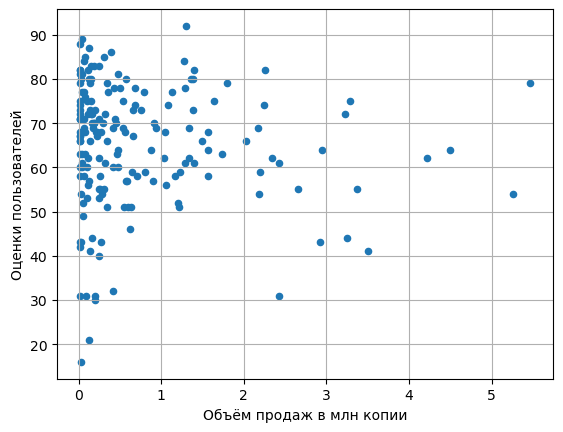

Значение корреляции: -0.06892505328279411


In [32]:
# Платформа XOne
user_XOne = df_new.query('platform =="XOne" and user_score < 101')
user_XOne.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки пользователей')
                                   
plt.show()
print('Значение корреляции:' , user_XOne['user_score'].corr(user_XOne['total_sales']))

* Коэффициент корреляции Пирсона отрицательный, но близкий к нулю. 
* Это сложно, поскольку мы не можем точно сказать, либо рост продаж связан с уменьшением пользовательских оценок, либо, наоборот, хорошие оценки пользователей получают именно те игры, продажи которых не задались. Или же тесной линейной связи между этими значениями нет.

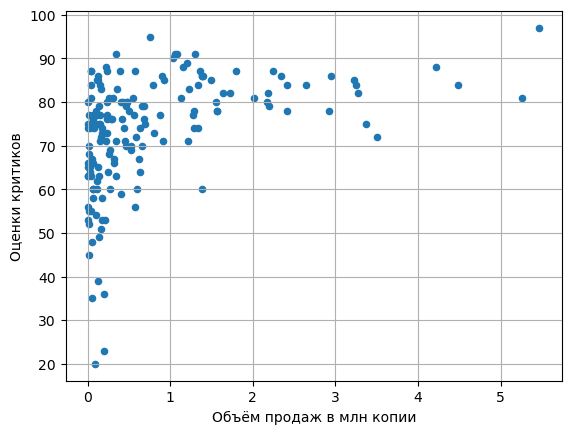

Значение корреляции: 0.4169983280084017


In [33]:
critic_XOne = df_new.query('platform =="XOne" and critic_score < 101')
critic_XOne.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки критиков')
                                   
plt.show()
print('Значение корреляции:' ,critic_XOne['critic_score'].corr(critic_XOne['total_sales']))

* Коэффициент больше нуля. Зависимость между значениями не высокая, но она есть. Популярные продукты платформы собирают больше положительных отзывов критиков, чем пользователей.

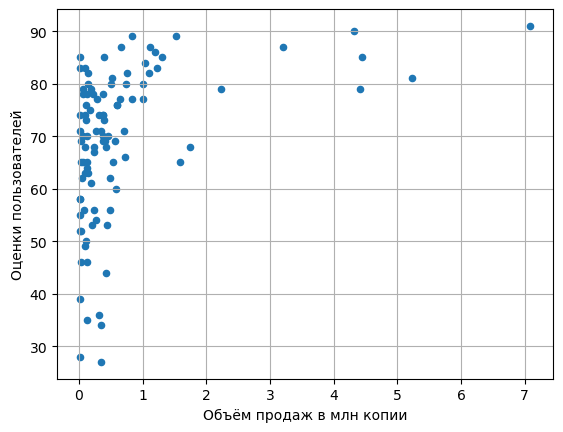

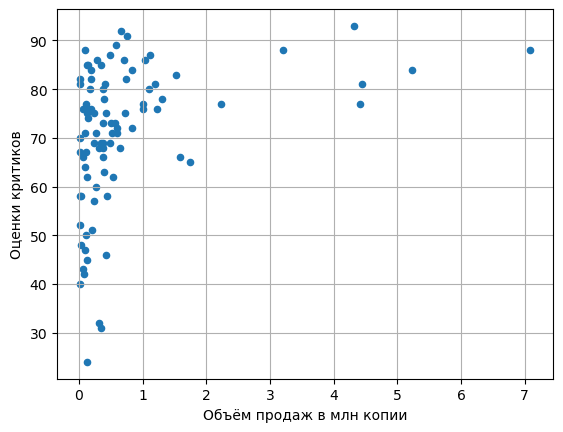

Значение корреляции: 0.4002190202148618
Значение корреляции: 0.34837976012017485


In [34]:
# Платформа WiiU
user_WiiU = df_new.query('platform =="WiiU" and user_score < 101')
critic_WiiU = df_new.query('platform =="WiiU" and critic_score < 101')


user_WiiU.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки пользователей')
critic_WiiU.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки критиков')
                                   
plt.show()
print('Значение корреляции:' ,user_WiiU['user_score'].corr(user_WiiU['total_sales']))
print('Значение корреляции:' ,critic_WiiU['critic_score'].corr(critic_WiiU['total_sales']))

* Коэффициент больше нуля. Зависимость между значениями не высокая, но она есть. Популярные продукты платформы собирают больше положительных отзывов и пользователей и критиков.

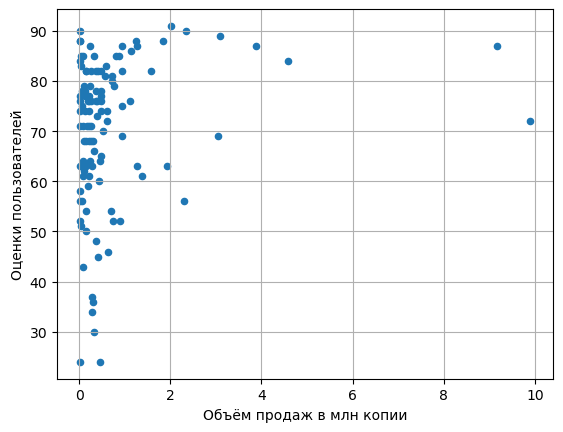

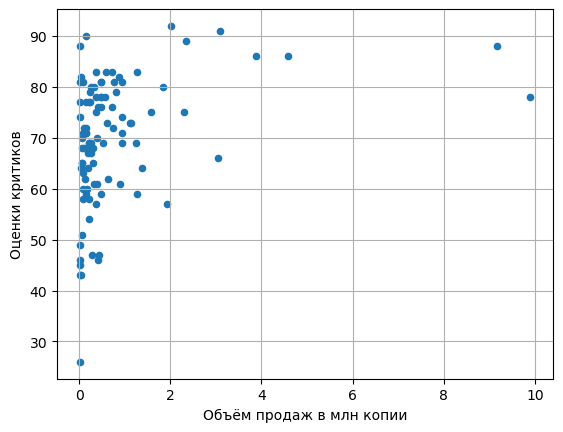

Значение корреляции: 0.19758263411038599
Значение корреляции: 0.3208028695360785


In [35]:
# Платформа 3DS
user_3DS = df_new.query('platform =="3DS" and user_score < 101')
critic_3DS = df_new.query('platform =="3DS" and critic_score < 101')


user_3DS.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки пользователей')
critic_3DS.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки критиков')
                                   
plt.show()
print('Значение корреляции:' ,user_3DS['user_score'].corr(user_3DS['total_sales']))
print('Значение корреляции:' ,critic_3DS['critic_score'].corr(critic_3DS['total_sales']))

* Коэффициент больше нуля. Зависимость между значениями не высокая, но она есть. Популярные продукты платформы собирают больше положительных отзывов и пользователей и критиков.

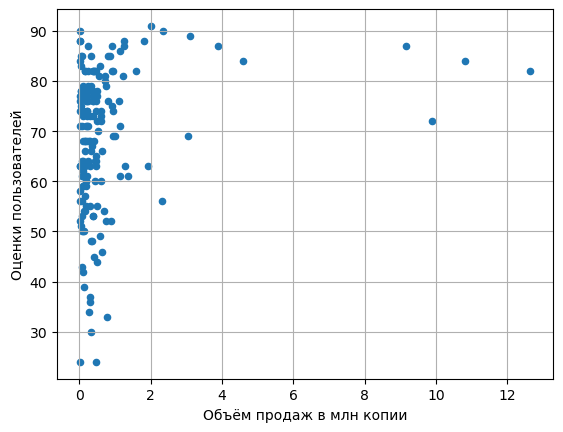

Значение корреляции: 0.22207843643390882


In [36]:
# Формирую df остальных платформ
others = df.query('platform != "PS4" and platform != "XOne" and platform != "WiiU" and platform =="3DS"')

#Формирую df с правильными значениями 'user_score'
user_others = others.query('user_score < 101')

user_others.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки пользователей')
plt.show()
print('Значение корреляции:' ,user_others['user_score'].corr(user_others['total_sales']))

* Корреляция слабая. Тренд на высокие оценки менее продаваемых игр, как и в случае с данными по `PS4` и `XOne` сохраняется.
* На поле более популярных игр меньше точек, что связано, вероятно, с меньшим их количеством по сравнению с играми, продажи которых оцениваются сотнями тысяч копий.

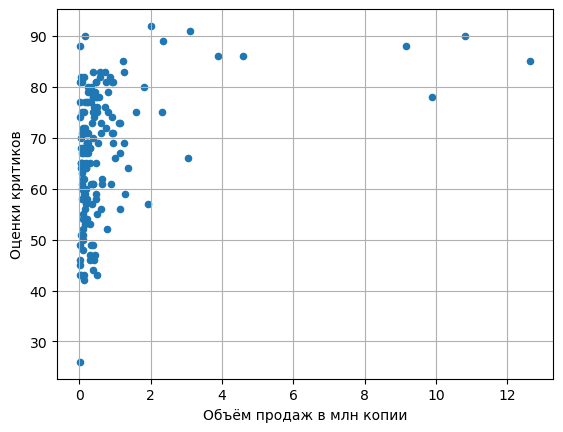

Значение корреляции: 0.3487397305984834


In [37]:
# Формирую df с правильными значениями 'critic_score'
critic_others = others.query('critic_score < 101')

critic_others.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='scatter',grid=True)\
                                                         .set(xlabel='Объём продаж в млн копии', ylabel='Оценки критиков')
plt.show()
print('Значение корреляции:' ,critic_others['critic_score'].corr(critic_others['total_sales']))

* Здесь коэффициент чуть ниже, скопление высоких оценок выражено ярче благодаря их количеству. 
* Наблюдаются положительные оценки (80-90) критиков у продуктов, продажи которых находятся в районе 2-4 млн. копий.

### 3.7 Анализ игровых жанров и прибыльности каждого из них

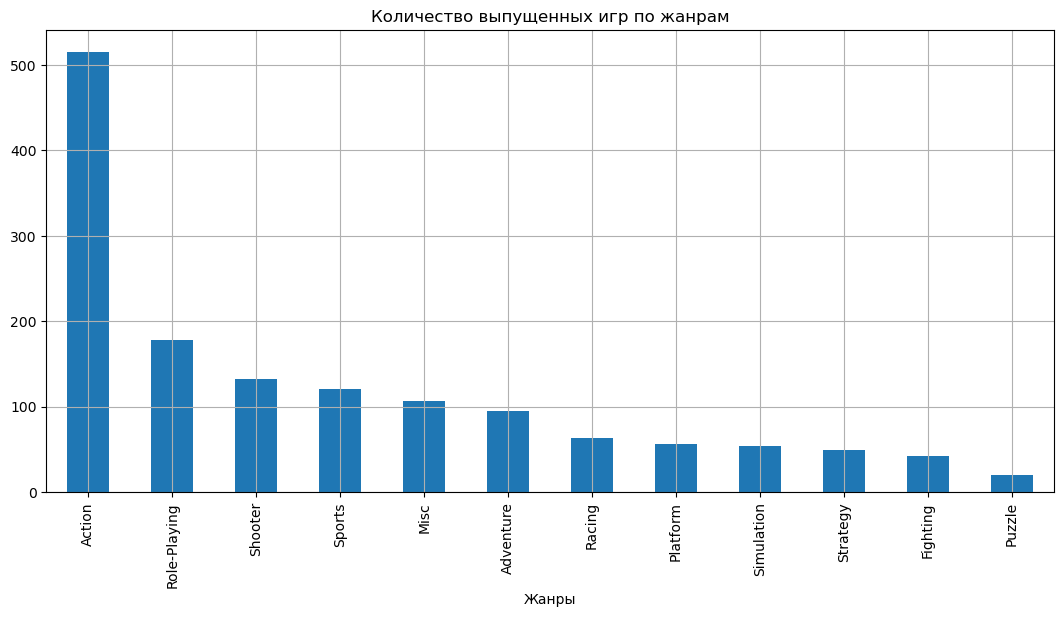

In [38]:
# Смотри количество игр выпущенных за актуальный период
genres = df_new.groupby('genre')['name'].count()
genres.sort_values(ascending=False).plot(kind='bar', figsize=(13, 6), grid=True ,title='Количество выпущенных игр по жанрам')\
                                        .set(xlabel='Жанры')

plt.show()

In [39]:
genres

genre
Action          515
Adventure        95
Fighting         42
Misc            107
Platform         56
Puzzle           20
Racing           63
Role-Playing    178
Shooter         132
Simulation       54
Sports          121
Strategy         49
Name: name, dtype: int64

* Больше всего игр в датасете в жанре экшен - 515. 
* Следующий по популярности у разработчиков жанр ролевой игры - 178 продуктов. 
* Шутеров 132. 
* Примерно одинаковое количество игр за актуальный период было выпущено в жанрах спорт и музыка. Оценим их популярность среди пользователей.

**Оценим их популярность среди пользователей.**

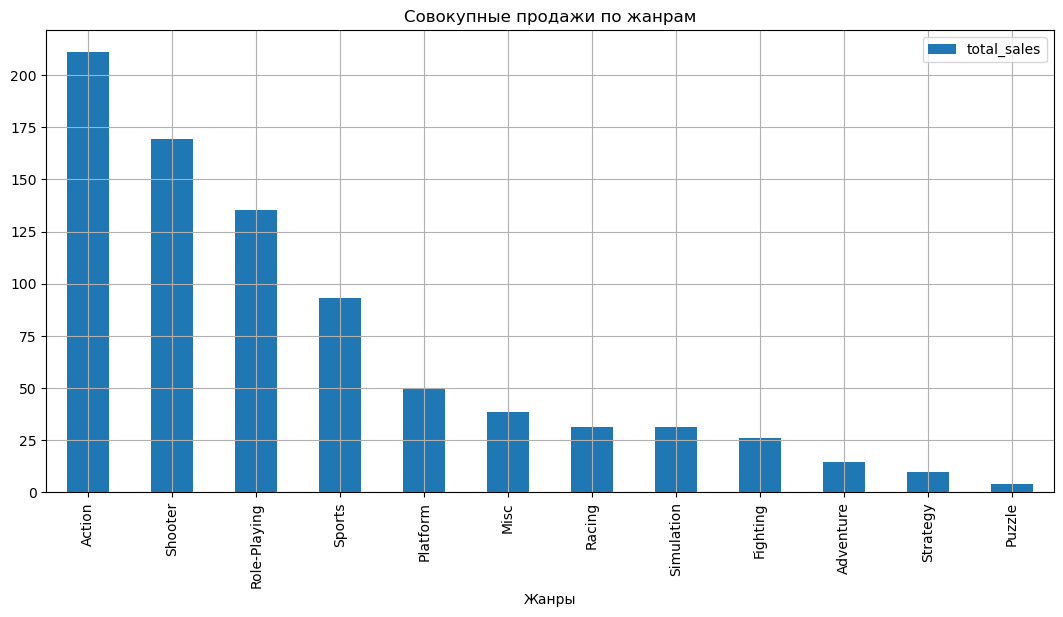

In [40]:
# Совокупные продажи по жанрам
genres_table = df_new.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
genres_table.plot(kind='bar', figsize=(13, 6), grid=True, title= 'Совокупные продажи по жанрам')\
             .set(xlabel= 'Жанры')

plt.show()

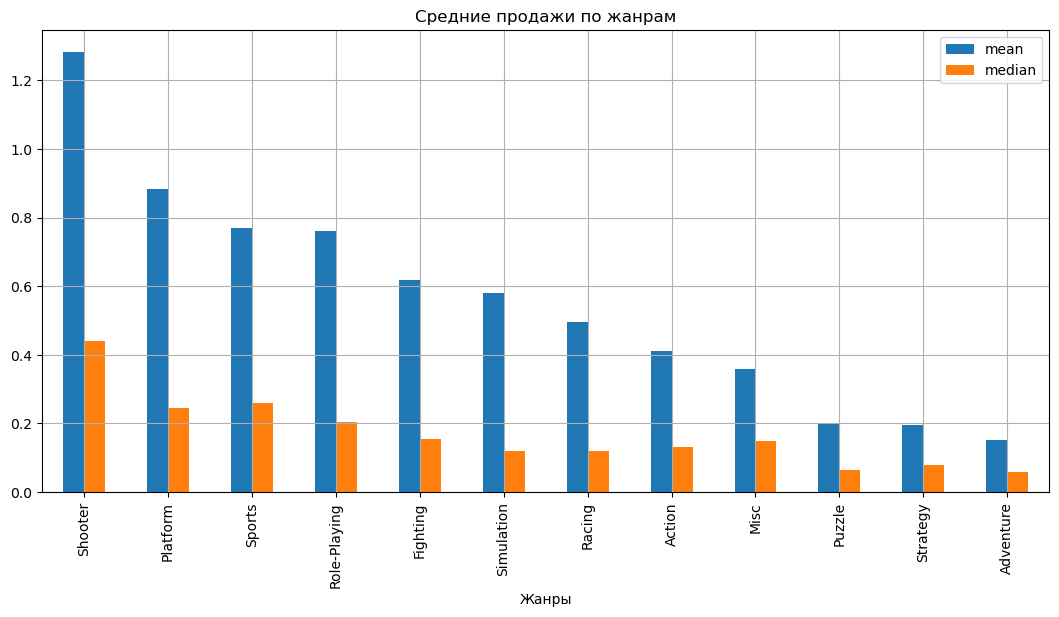

In [41]:
# Средние продажи по жанрам
genres_table_mean = df_new.pivot_table(index='genre', values='total_sales', aggfunc=('mean', 'median'))
genres_table_mean.sort_values(by='mean', ascending=False).plot(kind='bar', figsize=(13, 6), grid=True, \
                        title='Средние продажи по жанрам').set(xlabel= 'Жанры')

plt.show()

* `Экшен` наиболее производимый и наиболее продаваемый жанр в целом - за выбранный период было продано почти 200 млн. копий. Однако в среднем одна игра в этом жанре продается тиражом в 0,4 млн. копий. То есть жанр является наиболее продаваемым за счет большего количества выпускаемых игр.
* На втором месте `шутеры`  продано почти 170 млн. копий, несмотря на то, что выпущено их было всего 132. То есть в среднем можно продать до 1,3 млн. экземпляров каждой игры.
* На третьем месте по количеству выпускаемых игр в `ролевом жанре`, было продано 135 млн, средние продажи за единицу примерно 0,75 млн. копий.
* На четвертом месте игры жанре `спорт` совокупные продажи игр составляют  90 млн, тогда как выпущено их было чуть меньше(121), чем `шутеров`. Средняя продаваемость спортивных игр 0,75 млн. копий.
* Наконец в 5 лучших по продажам игры в жанре `платформ`. Количество выпущенных игр находится в районе 50, тогда как в среднем каждая из них продается тиражом в 0,85 млн. копий, что больше, чем для игр в жанрах `файтинг`, `рол плей`, `гонки`, `симуляции` .

* Таким образом, `экшен` и `рол плей` входят в топ-5 жанров за счет количества производимого контента, `шутеры`, `спортивные игры` и `платформеры` за счет средних продаж за единицу продукта.

# 4. Портрет пользователя каждого региона

* Определим для пользователей каждого региона (NA, EU, JP):
  * Самые популярные платформы (топ-5). Опишем различия в долях продаж.
  * Самые популярные жанры (топ-5).
  * Влияние рейтинга ESRB на продажи в отдельном регионе.

#### **Для анализа самых популярных платформ  создадим сводную таблицу и выявим топ-5 самых популярных платформ.**

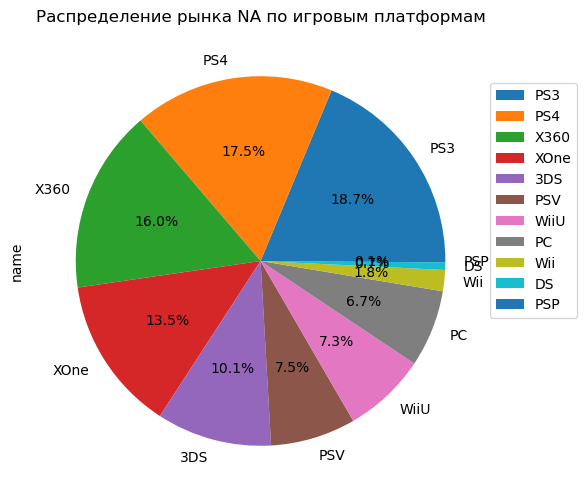

In [42]:
# формирую df со всеми платформами за Актуальный период в регионе NA
df_na = df.query('year_of_release >= 2012 and na_sales > 0')

# Рисую круговую диаграмму популярности всех платформ в регионе NA
(
    df_na
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(8, 6), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Распределение рынка NA по игровым платформам') # Название графика
plt.show()

* **Топ-5** наиболее популярных платформ в регионе **`NA`**:
  * **`PS3`**: 18.7% от общего объёма рынка
  * **`PS4`**: 17.5% от общего объёма рынка
  * **`X360`**: 16% от общего объёма рынка
  * **`XOne`**: 13.5% от общего объёма рынка
  * **`3DS`**: 10.1% от общего объёма рынка

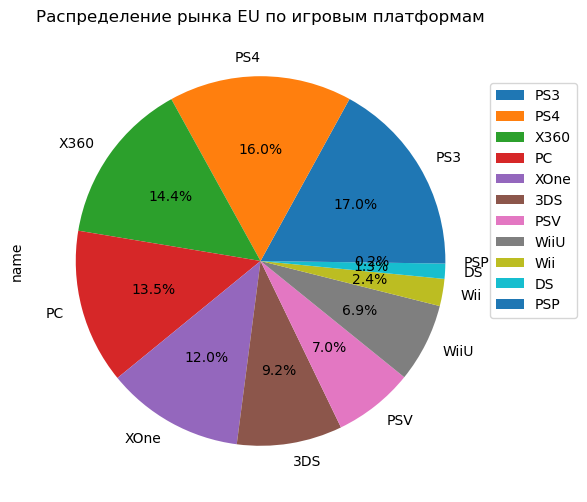

In [43]:
# формирую df со всеми платформами за Актуальный период в регионе EU
df_eu = df.query('year_of_release >= 2012 and eu_sales > 0')

# Рисую круговую диаграмму популярности всех платформ в регионе EU
(
    df_eu
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(8, 6), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Распределение рынка EU по игровым платформам') # Название графика
plt.show()


* **Топ-5** наиболее популярных платформ в регионе **`EU`**:
  * **`PS3`**: 17% от общего объёма рынка
  * **`PS4`**: 16% от общего объёма рынка
  * **`X360`**: 14.4% от общего объёма рынка
  * **`PC`**: 13.5% от общего объёма рынка
  * **`XOne`**: 12% от общего объёма рынка

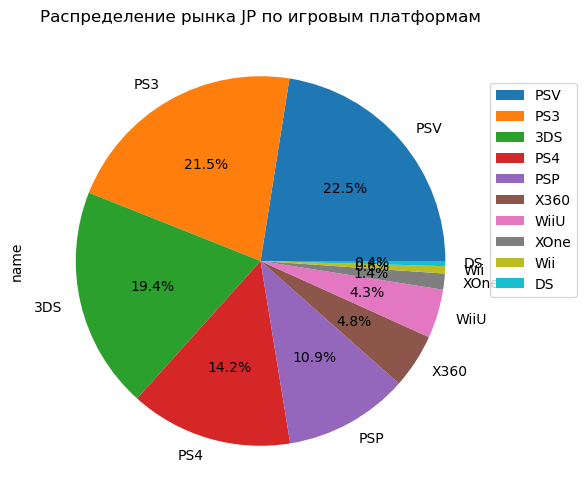

In [44]:
# формирую df со всеми платформами за Актуальный период в регионе JP
df_jp = df.query('year_of_release >= 2012 and jp_sales > 0')

# Рисую круговую диаграмму популярности всех платформ в регионе JP
(
    df_jp
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(8, 6), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Распределение рынка JP по игровым платформам') # Название графика
plt.show()


* **Топ-5** наиболее популярных платформ в регионе **`JP`**:
  * **`PSV`**: 22.5% от общего объёма рынка
  * **`PS3`**: 21.5% от общего объёма рынка
  * **`3DS`**: 19.4% от общего объёма рынка
  * **`PS4`**: 14.2% от общего объёма рынка
  * **`PSP`**: 10.9% от общего объёма рынка

#### **Для анализа самых популярных жанров создадим сводную таблицу и выявим топ-5 самых популярных платформ.**

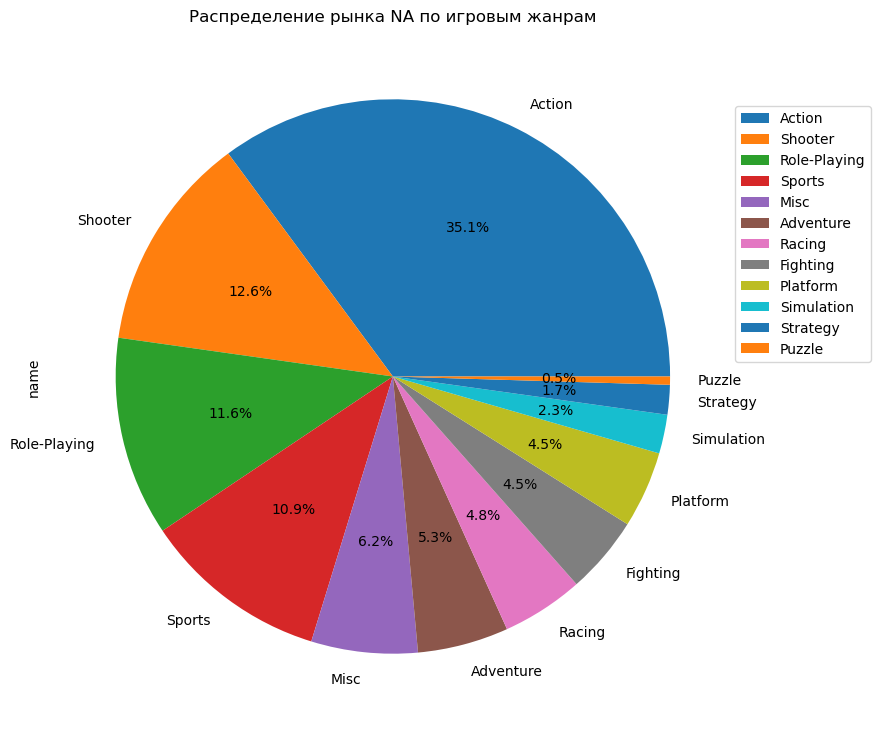

In [45]:
# Рисую круговую диаграмму популярности всех жанров в регионе NA
(
    df_na
    .pivot_table(index="genre", values="name", aggfunc="count")\
    .sort_values('name', ascending=False)\
    .plot(y="name", kind="pie", figsize=(10, 9), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Распределение рынка NA по игровым жанрам') # Название графика
plt.show()

* **Топ-5** наиболее популярных жанров в регионе **`NA`**:
  * **`Action`**: 35.1% от общего объёма рынка
  * **`Shooter`**: 12.6% от общего объёма рынка
  * **`Role-Playing`**: 11.6% от общего объёма рынка
  * **`Sports`**: 10.9% от общего объёма рынка
  * **`Misc`**: 6.2% от общего объёма рынка

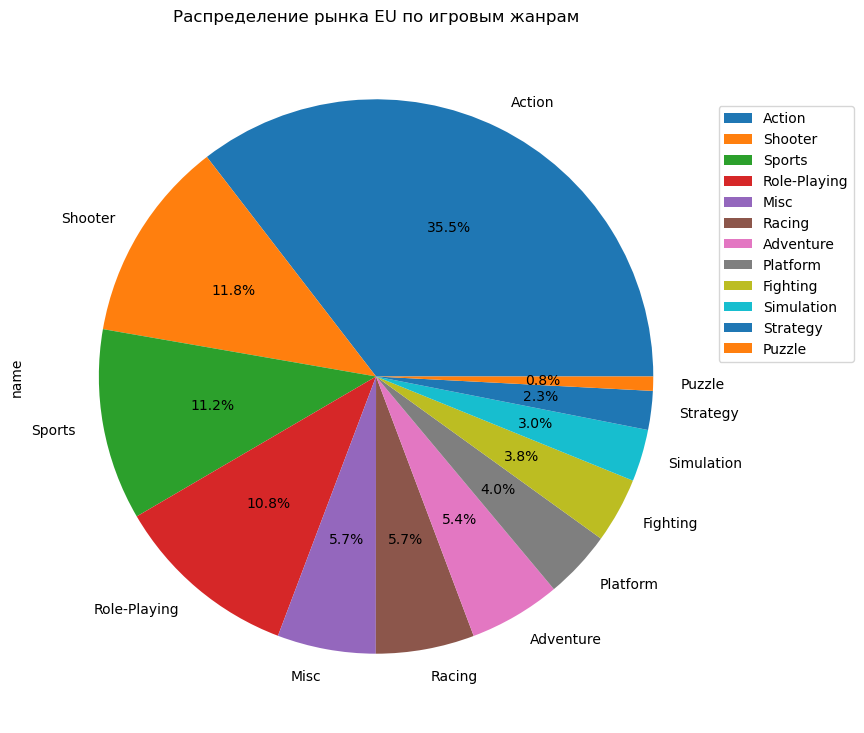

In [46]:
# Рисую круговую диаграмму популярности всех жанров в регионе EU
(
    df_eu
    .pivot_table(index="genre", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(10, 9), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Распределение рынка EU по игровым жанрам') # Название графика
plt.show()

* **Топ-5** наиболее популярных жанров в регионе **`EU`**:
  * **`Action`**: 35.5% от общего объёма рынка
  * **`Shooter`**: 11.8% от общего объёма рынка
  * **`Sports`**: 11.2% от общего объёма рынка
  * **`Role-Playing`**: 10.8% от общего объёма рынка
  * **`Misc`**: 5.7% от общего объёма рынка

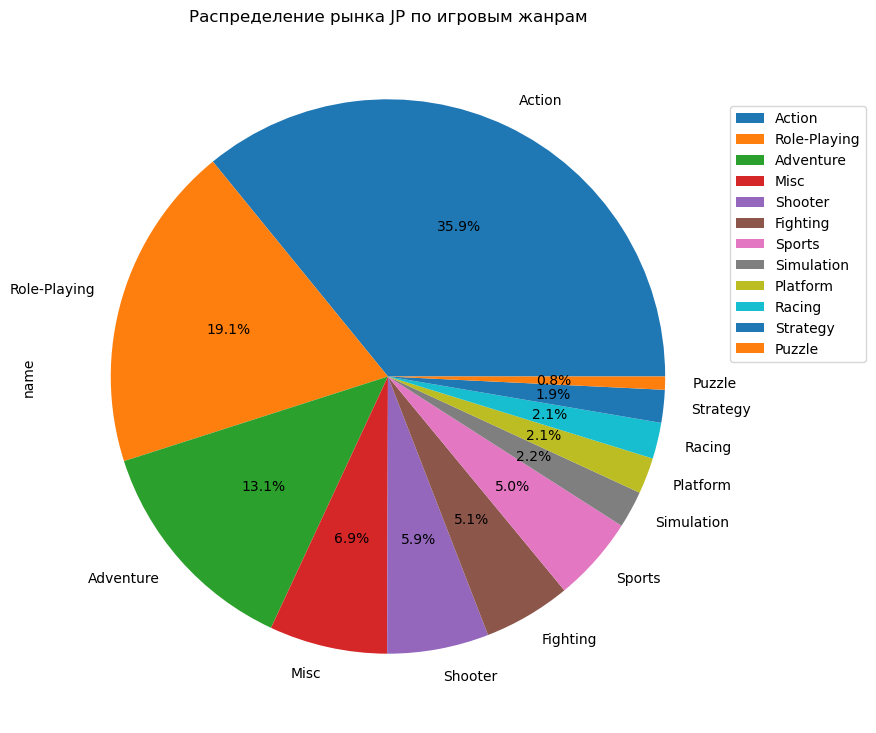

In [47]:
# Рисую круговую диаграмму популярности всех жанров в регионе JP
(
    df_jp
    .pivot_table(index="genre", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(10, 9), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Распределение рынка JP по игровым жанрам') # Название графика
plt.show()

* **Топ-5** наиболее популярных жанров в регионе **`JP`**:
  * **`Action`**: 35.9% от общего объёма рынка
  * **`Role-Playing`**: 19.1% от общего объёма рынка
  * **`Adventure`**: 13.1% от общего объёма рынка
  * **`Misc`**: 6.9% от общего объёма рынка
  * **`Shooter`**: 5.9% от общего объёма рынка

#### **Для анализа влияние рейтинга ESRB на продажи в отдельном регионе создадим сводную таблицу:**

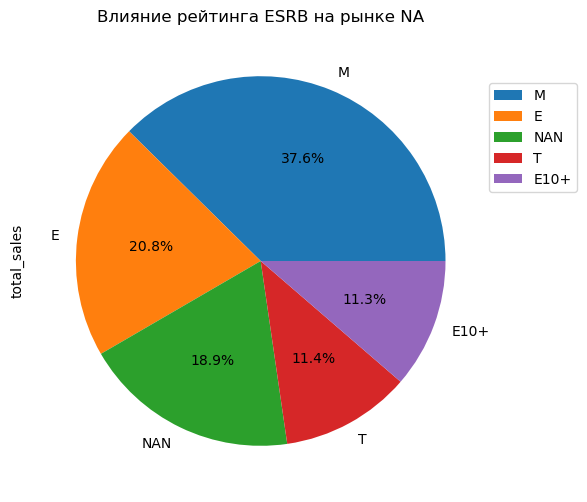

In [48]:
# Рисую круговую диаграмму суммарного объёма продаж для каждой оценки рейтинга ESRB в регионе NA
(
    df_na
    .pivot_table(index="rating", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending=False)
    .plot(y="total_sales", kind="pie", figsize=(8, 6), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Влияние рейтинга ESRB на рынке NA') # Название графика
plt.show()

Визуально проанализировав полученные на круговой диаграмме результаты, можно сделать вывод, что оценка рейтинга **ESRB** влияет на объём продаж игр в данном регионе. Таким образом игры с оценкой **`"M"`** составили наибольший суммарный объём продаж в данном регионе, а игры с рейтингом **`"T"`** и **`"E10+"`** имеют самую маленькую долю продаж в регионе.

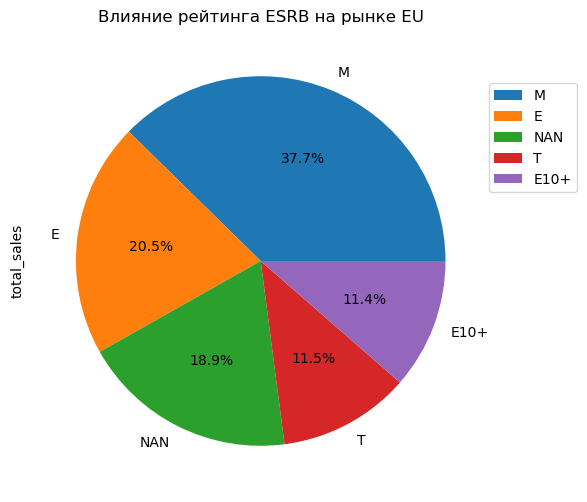

In [49]:
# Рисую круговую диаграмму суммарного объёма продаж для каждой оценки рейтинга ESRB в регионе EU
(
    df_eu
    .pivot_table(index="rating", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending=False)
    .plot(y="total_sales", kind="pie", figsize=(8, 6), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Влияние рейтинга ESRB на рынке EU') # Название графика
plt.show()

Визуально проанализировав полученные на круговой диаграмме результаты, можно сделать вывод, что оценка рейтинга **ESRB** влияет на объём продаж игр в данном регионе. Таким образом игры с оценкой **`"M"`** составили наибольший суммарный объём продаж в данном регионе, а игры с рейтингом **`"T"`** и **`"E10+"`** имеют самую маленькую долю продаж в регионе.

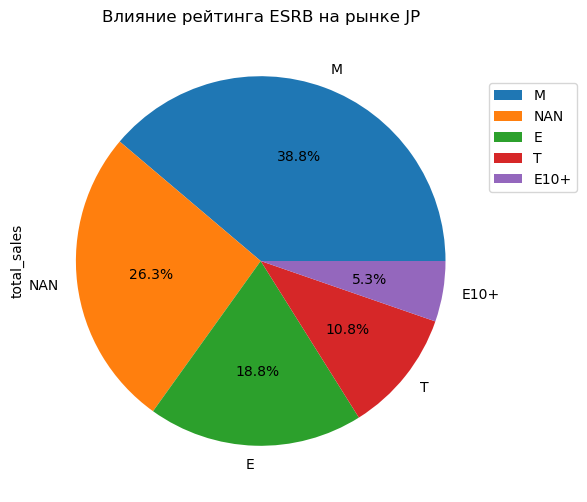

In [50]:
# Рисую круговую диаграмму суммарного объёма продаж для каждой оценки рейтинга ESRB в регионе JP
(
    df_jp
    .pivot_table(index="rating", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending=False)
    .plot(y="total_sales", kind="pie", figsize=(8, 6), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) # Расположение легенды на графике
plt.title('Влияние рейтинга ESRB на рынке JP') # Название графика
plt.show()

Для Японского рынка ситуация аналогичная как для `NA` и `EU` рынков, то есть оценка рейтинга **ESRB** влияет на объём продаж игр в данном регионе, таким образом игры с оценкой **`"M"`** составили наибольший суммарный объём продаж в данном регионе, а игры с рейтингом `"T"` и `"E10+"` имеют самую маленькую долю продаж в регионе.

### Вывод

**Проанализировав пользовательские портреты в трёх регионах `NA`, `EU`, `JP` можно выделить следующие сходства:**

* Во всех регионах наиболее популярным игровым жанром является **`Action`**(экшен)
* Во всех регионах игры с рейтингом **`ESRB`** равным **`M`** занимают наибольшую долю рынка и их доля не менее **37%**
* Во всех регионах игры с рейтингом **`ESRB`** равным **`E10+`** и **`T`** занимают наименьшую  долю рынка, которая обычно не превышает **11%**
* Во всех регионах платформа **`PS3`** является очень популярной, так в **`NA`** и **`EU`** она занимает первое место, а в **`JP`** занимает второе место по популярности платформ

**Теперь о сходствах EU и NA пользователях:**
* В целом они очень похоже между собой, так в обоих регионах первое место занимает платформа **`PS3`**, второе место **`PS4`**, и третье место **`X360`**.
* Наибольшую долю занимают игры жанра **`Action`** (экшен), далее идут **`Shooter`** и **`Sport`**, **`Role-Playing`** и **`Misc`**, что говорит о сходстве игроков **`NA`** и **`EU`** регионов

**О регионе JP:**
* Пользователи данного региона по своим предпочтениям отличается от пользователей из **`EU`** и **`NA`**, здесь жанр **`Role-Playing`** любят в два раза больше, а **`Shooter`** в два раза меньше чем в других регионах. Думаю этот показатель может характеризовать японцев как дружелюбный и работящий народ, который предпочитает усердную "прокачку персонажа" вместо "стрельбы и взрывов".

# 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей.

Таким образом:
* Нулевая гипотеза будет сформулирована следующим образом:
  * Средние пользовательские рейтинги платформы XOne равны средним пользовательским рейтингам платформы PC
* Альтернативная гипотеза звучит следующим образом:
  * Средние пользовательские рейтинги платформы XOne не равны средним пользовательским рейтингам платформы PC

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей воспользуюсь методом: **`scipy.stats.ttest_ind()`**.

In [51]:
# Создаю series для платформы "XOne" со всеми оценками пользователей
xone = df.query('platform =="XOne" and user_score < 101 and year_of_release >= 2012')['user_score']
# Создаю series для платформы "PC" со всеми оценками пользователей
pc = df.query('platform =="PC" and user_score < 101 and year_of_release >= 2012')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется больше него - отвергнем гипотезу
# Проверка нулевой гипотезы
results = st.ttest_ind(xone, pc)
print('p-значение:', results.pvalue, ClrDef)

if (results.pvalue < alpha):
    print('Нулевая гипотеза', 'Отвергнута!')
else:
    print('Нулевая гипотеза', 'не отвергнута!')

p-значение: 0.5535080500643805 
Нулевая гипотеза не отвергнута!


Проверив нулевую гипотезу о равенстве средних двух генеральных совокупностей я не отвергнул нулевую гипотезу, это значит, что Средние пользовательские рейтинги платформ **`Xbox One`** и **`PC`** одинаковые



**Посмотрим на распределение.**

In [52]:
np.var(xone)
np.var(pc)
xone_list = np.asarray(xone)
pc_list = np.asarray(pc)

In [53]:
pc_means = []
xb_means = []

for _ in range(1000):
    pc_random = np.random.choice(pc_list, size=len(pc_list), replace=True)
    xb_random = np.random.choice(xone_list, size=len(xone_list), replace=True)
    pc_means.append(np.mean(pc_random))
    xb_means.append(np.mean(xb_random))

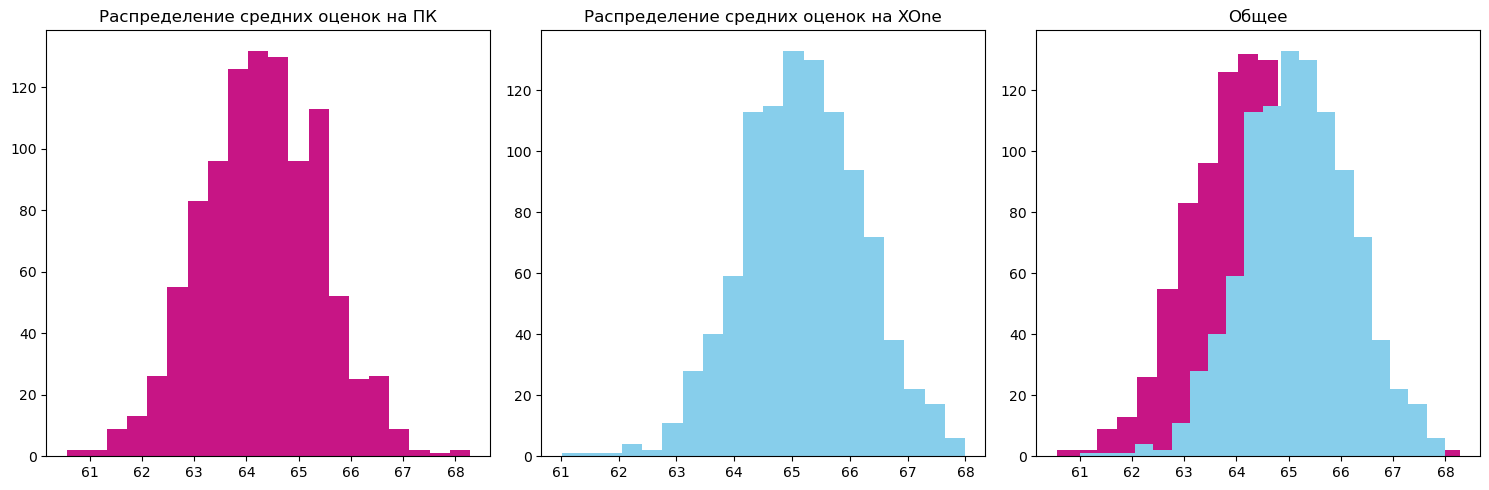

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].set_title('Распределение средних оценок на ПК')
ax[0].hist(pc_means, bins=20, color='mediumvioletred')

ax[1].set_title('Распределение средних оценок на XOne')
ax[1].hist(xb_means, bins=20, color='skyblue')

ax[2].set_title('Общее')
ax[2].hist(pc_means, bins=20, color='mediumvioletred')
ax[2].hist(xb_means, bins=20, color='skyblue')

fig.tight_layout()

**Распределения соответствуют нормальному и находятся вокруг среднего в 64 для `PC` и 66 для `XOne`.**

### Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей.

Таким образом:
* Нулевая гипотеза будет сформулирована следующим образом:
  * Средние пользовательские рейтинги жанра `Action` равны средним пользовательским рейтингам жанра `Sports`
* Альтернативная гипотеза звучит следующим образом:
  * Средние пользовательские рейтинги жанра `Action` не равны средним пользовательским рейтингам жанра `Sports`

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей воспользуюсь методом: **`scipy.stats.ttest_ind()`**.

In [55]:
# Создаю series для жанра "Action" со всеми оценками пользователей
action = df.query('genre =="Action" and user_score < 101 and year_of_release >= 2012')['user_score']
# Создаю series для жанра "Sports" со всеми оценками пользователей
sports = df.query('genre =="Sports" and user_score < 101 and year_of_release >= 2012')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется больше него - отвергнем гипотезу

    # Проверка нулевой гипотезы
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue, ClrDef)

if (results.pvalue < alpha):
    print('Нулевая гипотеза', 'Отвергнута!')
else:
    print('Нулевая гипотеза', 'не отвергнута!')

p-значение: 3.7163089460930885e-26 
Нулевая гипотеза Отвергнута!


Проверив нулевую гипотезу о равенстве средних двух генеральных совокупностей я отвергнул нулевую гипотезу, это значит, что Средние пользовательские рейтинги жанра `Action` и `Sports` разные.


**Посмотрим на распределение.**

In [56]:
np.var(action)
np.var(sports)
action_list = np.asarray(action)
sports_list = np.asarray(sports)

In [57]:
action_means = []
sports_means = []

for _ in range(1000):
    action_random = np.random.choice(action_list, size=len(action_list), replace=True)
    sports_random = np.random.choice(sports_list, size=len(sports_list), replace=True)
    action_means.append(np.mean(action_random))
    sports_means.append(np.mean(sports_random))

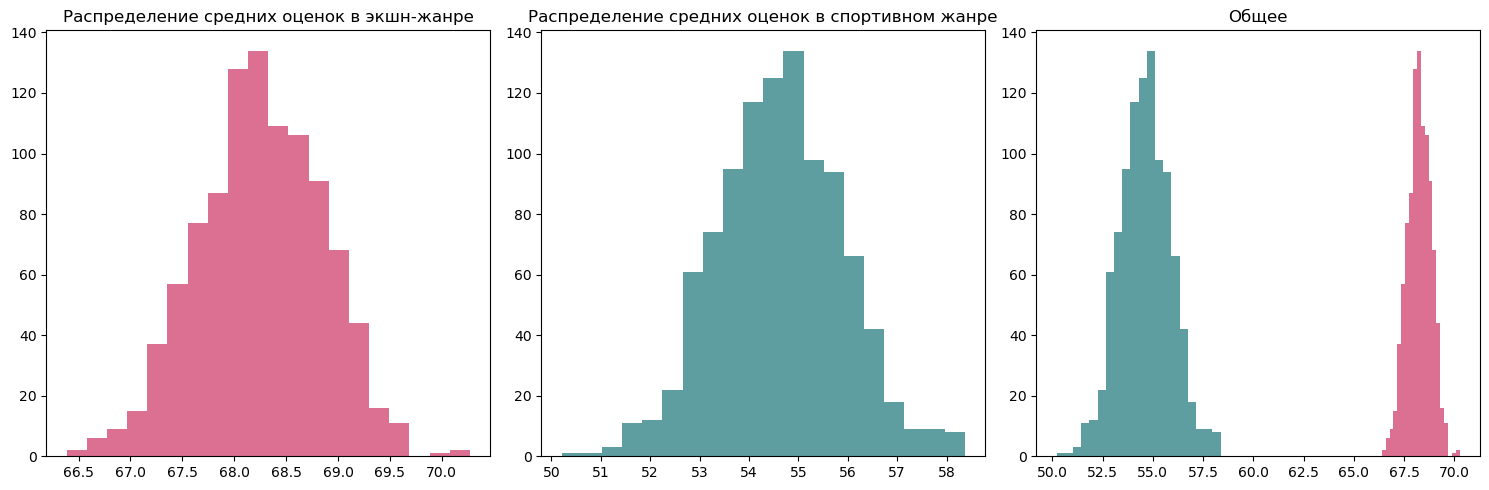

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].set_title('Распределение средних оценок в экшн-жанре')
ax[0].hist(action_means, bins=20, color='palevioletred')

ax[1].set_title('Распределение средних оценок в спортивном жанре')
ax[1].hist(sports_means, bins=20, color='cadetblue')

ax[2].set_title('Общее')
ax[2].hist(action_means, bins=20, color='palevioletred')
ax[2].hist(sports_means, bins=20, color='cadetblue')

fig.tight_layout()

* Средние распределены вокруг разных значений: пользовательская оценка игр в жанре экшен выше - в среднем **68 баллов**. 
* Для спортивных игр это значение находится в районе **55 баллов**. 
* Распределения не пересекаются, значит, мы отвергаем нулевую гипотезу и делаем вывод, что пользователи выше оценивают те игры, где упор делается на эксплуатацию физических возможностей игрока.

# 6.Общий вывод

* В ходе комплексного анализа мной был проведён исследовательский анализ данных о продажах игр, оценках пользователей и экспертов, а так же анализ игровых жанров и платформ. 
* Так же были составлены портреты пользователей для таких регионов как `NA`, `EU`, `JP`. 
* В ходе анализа было выявлено сколько игр выпускалось в разные годы, так же были изучены продажи для каждой платформы и определены платформы лидирующие по продажам. 
* Было изучено влияние отзывов пользователей и критиков на продажи внутри платформы, проведено сравнение зависимости продаж игр на всех платформах. 
* Также был выполнен анализ игровых жанров и прибыльности каждого жанра. Основываясь на полученных результатах исследования были проверены следующие гипотезы:

* Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые, **`гипотеза не отвергнута`**

* Средние пользовательские рейтинги жанров `Action` и `Sports` разные, **`гипотеза не отвергнута`**

* Было выявлено, что:
  * Зависимость между Отзывами Пользователей и Продажами игр  отсутствует, так как коэффициент корреляции составил **-0.031**, что в свою очередь означает фактическое отсутствие взаимосвязи данных параметров. 
  * Также интересным фактором является то, что средняя оценка пользователей составляет **67** баллов и основная масса оценок располагается в диапазоне **от 60 до 80 баллов**, а больше всего оценок располагается в диапазоне **от 70 до 80 баллов**.
  * Зависимость между Отзывами Критиков и Продажами игр  присутствует, но она не очень высокая, так как коэффициент корреляции составил **0.406**, то есть наблюдается зависимость между положительными отзывами и увеличением объёма продаж игр, но зависимость довольна слабая, чтобы утверждать что данные показатели напрямую связаны между собой. 
  * Также интересным фактором является то, что средняя оценка критиков составляет **72 балла** и основная масса оценок располагается в диапазоне **от 65 до 80 баллов**, а больше всего оценок располагается в диапазоне **от 70 до 80 баллов**.

* Самыми прибыльными игровыми жанрами являются:
  * `Action` (экшен)
    * **26%** от общей доли рынка
    * **211.11** млн. копий
  * `Shooter` (шутеры)
    * **20.8%** от общей доли рынка
    * **169.30** млн. копий
  * `Role-Playing` (рол плей)
    * **14.1%** от общей доли рынка
    * **135.38** млн. копий

* Самыми наименее прибыльными являются жанры:
  * `Puzzle` - **0.5%** от общей доли рынка
  * `Strategy` - **1.2%** от общей доли рынка
  * `Adventure` - **1.8%** от общей доли рынка

* Проанализировав пользовательские портреты в регионах `NA`, `EU`, `JP` можно выделить следующие сходства:
  * Во всех регионах наиболее популярным игровым жанром является `Action` *(экшен)
  * Во всех регионах игры с рейтингом `ESRB` равным `M` занимают наибольшую долю рынка и их доля не менее **37%**
  * Во всех регионах игры с рейтингом `ESRB` равным `E10+` и `T` занимают наименьшую долю рынка, которая обычно не превышает **11%**
  * Во всех регионах платформа **`PS3`** является очень популярной, так в `NA` и `EU` она занимает первое место, а в `JP` занимает второе место по популярности платформ

* Теперь о сходствах **EU** и **NA** пользователях:
  * В целом они очень похоже между собой, так в обоих регионах первое место занимает платформа **`PS3`**, второе место **`PS4`**, и третье место **`X360`**.
  * Наибольшую долю занимают игры жанра **Action** (экшен), далее идут **Shooter** и **Role-Playing** , **Sport** и **Misc**, что говорит о сходстве игроков `NA` и `EU` регионов

* О регионе **JP**:
  * Пользователи данного региона по своим предпочтениям отличается от пользователей из `EU` и `NA`, здесь жанр **Role-Playing** любят в два раза больше, а **Shooter** в два раза меньше чем в других регионах.

* В ходе анализа удалось выяснить, что:
  * Средние пользовательские рейтинги платформ **`Xbox One`** и **`PC`**   практически одинаковые
  * Средние пользовательские рейтинги жанров **Action** и **Sports**     разные